# MLR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("Housing.csv");

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<AxesSubplot:>

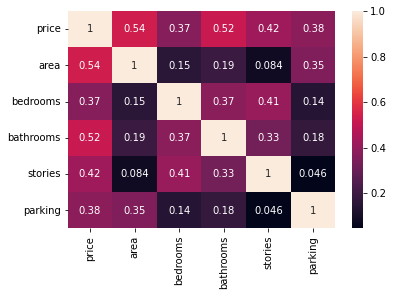

In [7]:
# plot the heatmap
corr = df.corr()
sns.heatmap(corr,annot=True)

sns.pairplot(df)
plt.show()

<AxesSubplot:>

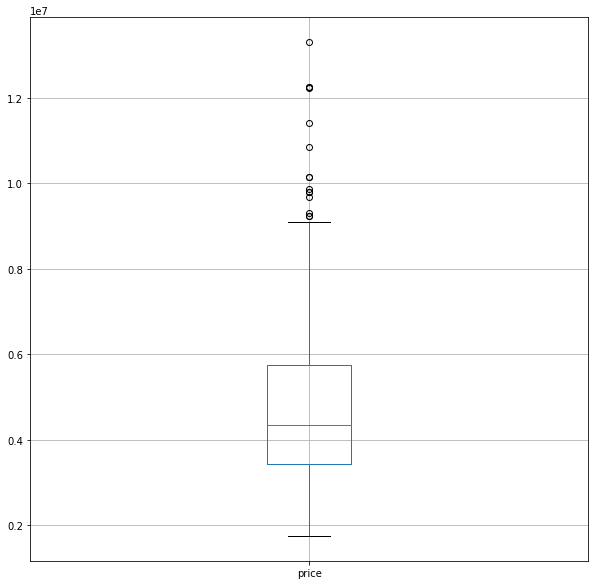

In [8]:
df.boxplot(['price'], figsize=(10, 10))

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

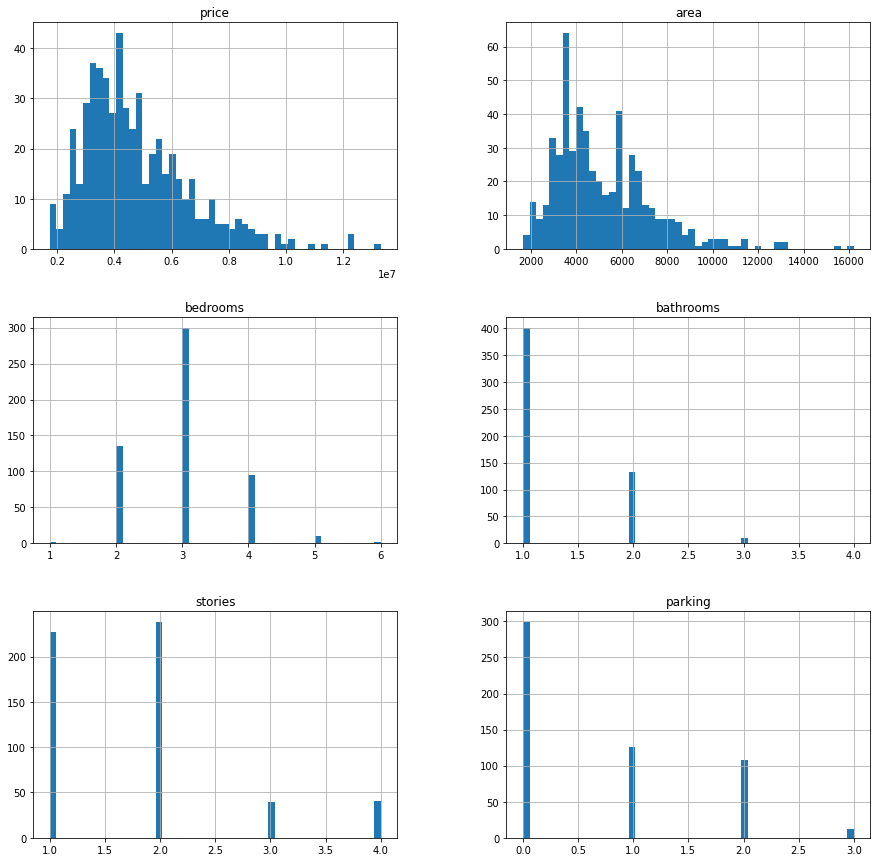

In [9]:
# histogram
df.hist(bins=50, figsize=(15, 15))

# Prepare the data
- ### Encoding Categorical data
    -
    - Data can be numeric : discrit and continuous
    - Data can be categarical : nominal , odinal
        - nominal : 
        - odinal : there is intrensict sence on order in the data

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Encoding Categorical Variables
- Encoding Mainroad

In [11]:
df["mainroad"] = df["mainroad"].map({
    'yes' : 1,
    'no' : 0
})

- Encoding Guest Room

In [12]:
df["guestroom"] = df["guestroom"].map({
    'yes' : 1,
    'no' : 0
})

- Encoding basement

In [13]:
df["basement"] = df["basement"].map({
    'yes' : 1,
    'no' : 0
})

- Encoding hotwaterheating

In [14]:
df["hotwaterheating"] = df["hotwaterheating"].map({
    'yes' : 1,
    'no' : 0
})

- Encoding airconditioning

In [15]:
df["airconditioning"] = df["airconditioning"].map({
    'yes' : 1,
    'no' : 0
})

- Encoding prefarea

In [16]:
df["prefarea"] = df["prefarea"].map({
    'yes' : 1,
    'no' : 0
})

- Encoding furnishingstatus

In [17]:
df1 = pd.get_dummies(df["furnishingstatus"],drop_first=True)

df = pd.concat([df,df1],axis=1)
df = df.drop(axis=1,columns=["furnishingstatus"])

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

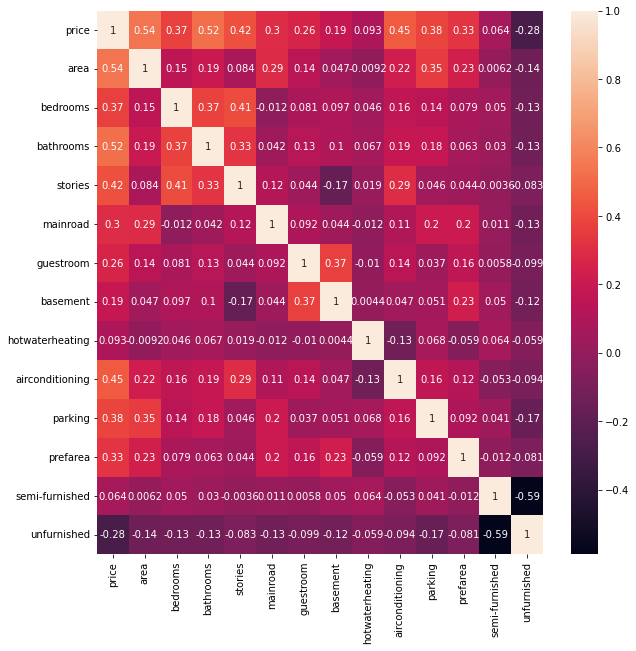

In [18]:
# plot the heatmap
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

# Spliting The data

In [19]:
# X = df.iloc[:,0].values.reshape(-1,1)
# y = df.iloc[:,1:10].values.reshape(-1,1)

y = df.pop("price")
X = df

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8 , test_size=0.2, random_state=10)

In [21]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
443,4320,3,1,1,0,0,0,0,0,1,0,0,1
323,5400,3,1,1,1,0,0,0,0,3,0,1,0
157,2817,4,2,2,0,1,1,0,0,1,0,0,0
231,4320,3,1,1,1,0,0,0,0,0,1,1,0
351,3600,2,1,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,3600,2,1,1,1,0,0,0,0,0,0,0,0
320,4320,3,1,2,1,0,0,0,0,2,1,0,0
527,1836,2,1,1,0,0,1,0,0,0,0,1,0
125,15600,3,1,1,1,0,0,0,1,2,0,1,0


# Standardized a data
### Scaling A values
    - MinMax Scaler ( y = ( x - Min ) / ( Max - Min ) )
    - Standerd Scaler ( y = ( x - Mean ) / standard_deviation ) 
       - standerscaler used

#### Min Max Scaler

#### Scaling on y data

In [22]:
num_var = ["area","stories","parking","bathrooms","bedrooms"]

In [23]:
datapoints = np.array(y_train).reshape(-1,1)
datapoints2 = np.array(y_test).reshape(-1,1)
minmax_scaler = MinMaxScaler();

y_train_scal = minmax_scaler.fit_transform(datapoints)
y_test_scal = minmax_scaler.transform(datapoints2)

y_train = y_train_scal.reshape(-1)
y_test = y_test_scal.reshape(-1)

#### Scaling on X data

In [24]:
minmax_scaler = MinMaxScaler();

X_train[num_var] = minmax_scaler.fit_transform(X_train[num_var])
X_test[num_var] = minmax_scaler.transform(X_test[num_var])

# X_train[num_var] = X_train_scal
# X_test[num_var] = X_test_scal



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [25]:
model = LinearRegression() # Instence of liner model

In [26]:
model.fit(X_train,y_train) # Train A model

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0.07410106, 0.17625241, 0.35328598, 0.17510617, 0.42455777,
       0.44820011, 0.15580707, 0.10873513, 0.31967529, 0.11469205,
       0.27625396, 0.0314252 , 0.22182108, 0.25160502, 0.42022698,
       0.07040679, 0.4745287 , 0.41719865, 0.30267424, 0.23147274,
       0.0701377 , 0.01616468, 0.36779797, 0.32051425, 0.43047781,
       0.39226267, 0.17229041, 0.1656589 , 0.17480025, 0.16609742,
       0.22505562, 0.28233705, 0.32788082, 0.31833419, 0.48696904,
       0.28364454, 0.41940479, 0.0465077 , 0.30654713, 0.33274018,
       0.27009752, 0.32027096, 0.09713207, 0.40360385, 0.35421662,
       0.51598911, 0.56949853, 0.38273336, 0.15542525, 0.28415058,
       0.14402659, 0.3569866 , 0.19934947, 0.25457441, 0.09371256,
       0.34469971, 0.29910211, 0.16953705, 0.19072434, 0.24243219,
       0.24988642, 0.27343286, 0.30129798, 0.16473178, 0.22011867,
       0.43329712, 0.11374158, 0.06749419, 0.06066566, 0.48129755,
       0.21412398, 0.41800124, 0.38239602, 0.16236473, 0.08439

### MSE

In [32]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
RMSE

0.07526318268014656

## R<sup>2</sup>

In [29]:
r2 = r2_score(y_test,y_pred)
r2

0.7312408811520086